In [85]:
# Create a sentiment analysis model using Amazon reviews of a wireless xbox controller
# to predict positive, negative, or neutral sentiments. 

# Create another model that can predict the rating of Amazon reviews of a wireless xbox
# controller (1-5 stars).

In [86]:
# Import required libraries.

import requests
import pandas as pd
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [87]:
# Scrape wireless xbox controller reviews from Amazon.com.

product_link = "https://www.amazon.com/Xbox-Wireless-Controller-Pulse-Red-Windows-Devices/product-reviews" \
               "/B0859XT328/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1"

HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/90.0.4430.212 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})

# Gather the first 100 pages of reviews.
html_data = ""
for i in range(200):
    current_page = str("=" + str(int((i + 1))))
    next_page = str("=" + str(int((i + 2))))
    html_data += requests.get(product_link, headers=HEADERS).text
    product_link = product_link.replace(current_page, next_page)

soup = BeautifulSoup(html_data, "html.parser")

In [88]:
# Gather the titles, ratings (1-5 stars), and descriptions of each review. Create a new
# category called "sentiment" that classifies the reviews as positive, negative, or neutral
# depending on the amount of stars it has (1-2 = negative, 3 = neutral, 4-5 = positive).

html_data = soup.find_all("div", {"data-hook": "review"})

# Store each review in a list.
reviews = []
for review in html_data:
    title = ""
    rating = ""
    description = ""
    sentiment = ""
    try:
        title = review.find("a", {"data-hook": "review-title"}).text.strip()
        rating = float(review.find("i", {"data-hook": "review-star-rating"}).text.replace("out of 5 stars", "")
                       .strip())
        description = review.find("span", {"data-hook": "review-body"}).text.replace("Read more", "").strip()
        if rating < 3:
            sentiment = "negative"
        elif rating < 4:
            sentiment = "neutral"
        else:
            sentiment = "positive"
    except AttributeError:
        pass

    # Ignore reviews without descriptions.
    if title != "" and rating != "" and description != "" and "The media could not be loaded." not in description \
            and "a " not in description:
        review_dict = {
            "title": title,
            "rating": rating,
            "description": description,
            "sentiment": sentiment
        }
        reviews.append(review_dict)

In [89]:
# Create a dataframe.
df = pd.DataFrame(reviews)

In [90]:
# Print 5 rows of the dataframe.
print(df.head(5))

                                               title  rating  \
0                            Great controller for PC     5.0   
1      Finally playing pc games with a controller (:     5.0   
2                     A more refined Xbox controller     5.0   
3                           not what I was expecting     1.0   
4  PC Users: You have to buy the wireless adapter...     4.0   

                                         description sentiment  
0  The controller works great with PC. However, o...  positive  
1  For PC players, you DO NOT need to buy the wir...  positive  
2  This review is for the new "Shock Blue" varian...  positive  
3  for the price I did not expect to get a wirele...  negative  
4  Pictured: The Robot White controller (it looks...  positive  


In [91]:
# Create 4 models. 

# The first two will use a support vector classifier (SVC). One will use ratings and the other sentiments.
# The second will use naive bayes (NB). One will use ratings and the other sentiments.

In [92]:
# (SVC) Review ratings model - create a model that predicts the RATING of reviews (1-5 stars).

In [93]:
# (SVC) Review ratings model - vectorize the reviews.

tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1, 5), analyzer="char")
X = tfidf.fit_transform(df["description"])
y = df["rating"]

In [94]:
# (SVC) Review ratings model - train the data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [95]:
# (SVC) Review ratings model - fit the data.

clf = LinearSVC(C=20, class_weight="balanced", max_iter=20000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [96]:
# (SVC) Review ratings model - display a classification report. Show the accuracy of the model.
# being able to predict a rating (1-5 stars).

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.61      0.63      0.62       110
         2.0       0.30      0.23      0.26        30
         3.0       0.25      0.16      0.19        32
         4.0       0.31      0.25      0.28        36
         5.0       0.80      0.89      0.84       190

    accuracy                           0.65       398
   macro avg       0.45      0.43      0.44       398
weighted avg       0.62      0.65      0.63       398



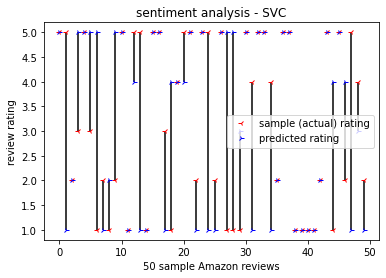

In [97]:
# (SVC) Review ratings model - plot some sample data. Show 50 samples.

y_test = y_test.tolist()
y_pred = y_pred.tolist()

fig1 = plt.figure()
ax1 = plt.axes()

ax1.plot(y_test[0:50], "3", color="red", label="sample (actual) rating")
ax1.plot(y_pred[0:50], "4", color="blue", label="predicted rating")

for i in range(50):  # len(y_test)
    ax1.vlines(x=i, ymin=y_test[i], ymax=y_pred[i], color="black")

ax1.legend(numpoints=1)
ax1.set_title("sentiment analysis - SVC")
ax1.set_xlabel("50 sample Amazon reviews")
ax1.set_ylabel("review rating")

plt.show()

In [98]:
# (SVC) Review sentiment model - create a model that predicts the SENTIMENT of reviews (pos, neg, neut).

In [99]:
# (SVC) Review sentiment model - vectorize the reviews.

tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1, 5), analyzer="char")
X = tfidf.fit_transform(df["description"])
y = df["sentiment"]

In [100]:
# (SVC) Review sentiment model - train the data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [101]:
# (SVC) Review sentiment model - fit the data.

clf = LinearSVC(C=20, class_weight="balanced", max_iter=20000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [102]:
# (SVC) Review sentiment model - display a classification report. Show the accuracy of the model.
# being able to predict a sentiment (pos, neg, neut).

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.78      0.78      0.78       140
     neutral       0.27      0.09      0.14        32
    positive       0.84      0.92      0.88       226

    accuracy                           0.80       398
   macro avg       0.63      0.60      0.60       398
weighted avg       0.77      0.80      0.78       398



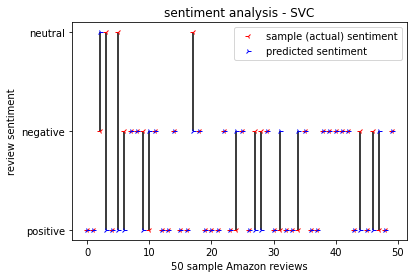

In [103]:
# (SVC) Review sentiment model - plot some sample data. Show 50 samples.

y_test = y_test.tolist()
y_pred = y_pred.tolist()

fig2 = plt.figure()
ax2 = plt.axes()

ax2.plot(y_test[0:50], "3", color="red", label="sample (actual) sentiment")
ax2.plot(y_pred[0:50], "4", color="blue", label="predicted sentiment")

for i in range(50): 
    ax2.vlines(x=i, ymin=y_test[i], ymax=y_pred[i], color="black")

ax2.legend(numpoints=1)
ax2.set_title("sentiment analysis - SVC")
ax2.set_xlabel("50 sample Amazon reviews")
ax2.set_ylabel("review sentiment")

plt.show()

In [104]:
# (NB) Review ratings model - create a model that predicts the RATING of reviews (1-5 stars).

In [105]:
# (NB) Review ratings model - use review description and rating.

x = df["description"]
y = df["rating"]

In [106]:
# (NB) Review ratings model - train the data.

x, x_test, y, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=42)

In [107]:
# (NB) Review ratings model - transform the data.

vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [108]:
# (NB) Review ratings model - fit the data.

model = MultinomialNB()
model.fit(x, y)

y_pred = model.predict(x_test)

In [109]:
# (NB) Review ratings model - display a classification report. Show the accuracy of the model.
# being able to predict a rating (1-5 stars).

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.58      0.85      0.69       126
         2.0       0.40      0.05      0.08        43
         3.0       0.00      0.00      0.00        42
         4.0       0.50      0.02      0.04        51
         5.0       0.72      0.94      0.82       235

    accuracy                           0.66       497
   macro avg       0.44      0.37      0.33       497
weighted avg       0.57      0.66      0.57       497



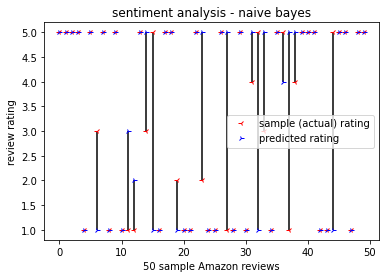

In [110]:
# (NB) Review ratings model - plot some sample data. Show 50 samples.

y_test = y_test.tolist()
y_pred = y_pred.tolist()

fig2 = plt.figure()
ax2 = plt.axes()

ax2.plot(y_test[0:50], "3", color="red", label="sample (actual) rating")
ax2.plot(y_pred[0:50], "4", color="blue", label="predicted rating")

for i in range(50):  # len(y_test)
    ax2.vlines(x=i, ymin=y_test[i], ymax=y_pred[i], color="black")

ax2.legend(numpoints=1)
ax2.set_title("sentiment analysis - naive bayes")
ax2.set_xlabel("50 sample Amazon reviews")
ax2.set_ylabel("review rating")

plt.show()

In [111]:
# (NB) Review sentiment model - create a model that predicts the SENTIMENT of reviews (pos, neg, neut).

In [112]:
# (NB) Review sentiment model - use review description and rating.

x = df["description"]
y = df["sentiment"]

In [113]:
# (NB) Review sentiment model - train the data.

x, x_test, y, y_test = train_test_split(x, y, stratify=y, test_size=0.25, random_state=42)

In [114]:
# (NB) Review sentiment model - transform the data.

vec = CountVectorizer(stop_words='english')
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

In [115]:
# (NB) Review sentiment model - fit the data.

model = MultinomialNB()
model.fit(x, y)

y_pred = model.predict(x_test)

In [116]:
# (NB) Review sentiment model - display a classification report. Show the accuracy of the model.
# being able to predict a sentiment (pos, neg, neut).

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.78      0.88      0.82       169
     neutral       0.00      0.00      0.00        42
    positive       0.87      0.92      0.89       286

    accuracy                           0.83       497
   macro avg       0.55      0.60      0.57       497
weighted avg       0.76      0.83      0.80       497



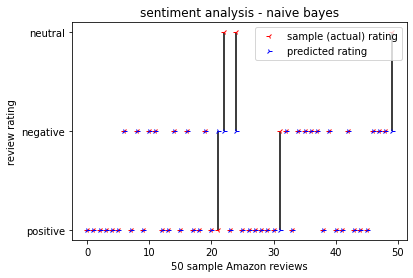

In [117]:
# (NB) Review sentiment model - plot some sample data. Show 50 samples.

y_test = y_test.tolist()
y_pred = y_pred.tolist()

fig2 = plt.figure()
ax2 = plt.axes()

ax2.plot(y_test[0:50], "3", color="red", label="sample (actual) rating")
ax2.plot(y_pred[0:50], "4", color="blue", label="predicted rating")

for i in range(50):  # len(y_test)
    ax2.vlines(x=i, ymin=y_test[i], ymax=y_pred[i], color="black")

ax2.legend(numpoints=1)
ax2.set_title("sentiment analysis - naive bayes")
ax2.set_xlabel("50 sample Amazon reviews")
ax2.set_ylabel("review rating")

plt.show()

In [118]:
# ANALYSIS
#
#
# The classification model was able to more accurately predict ratings (1-5 stars)
# than the naive bayes model by 1%. It was able to much more accurately predict 
# 3 star ratings than the naive bayes one without additional tinkering. 
#
# The naive bayes model was able to more accurately predict sentiments (pos, neg,
# and neutr) than the classification model by 3%. It wasn't able to predict
# neutral sentiments well at all, but gave strong results for positive and negative
# sentiments. This could partly be due to the fact there aren't many 3 star reviews 
# using language that well depicts something that isn't too high or too low - which 
# makes it extremely difficult to make middle-of-the-road predictions.
#
# The takeaway is naive bayes is the best option to use in this example. While it
# doesn't outperform the model using a support vector classifier, with further 
# optimization for 3-star reviews, it can potentially be much more accurate.